# Data Science And Business Analysis Internship

# Name:  Lakshmi Sahithi V


# Task 2: Prediction Using Unsupervised ML(Level:Beginner)

## Import Statements 

In [15]:
import pandas as pd
from pandas import DataFrame

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns


from sklearn.cluster import KMeans
%matplotlib inline

In [16]:
iris_data=pd.read_csv("Iris.csv")
print("Read the data successfully!")

Read the data successfully!


In [17]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [18]:
iris_data.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [19]:
iris_data.isnull().count()

Id               150
SepalLengthCm    150
SepalWidthCm     150
PetalLengthCm    150
PetalWidthCm     150
Species          150
dtype: int64

## Data Visualization 

### Scatter plot

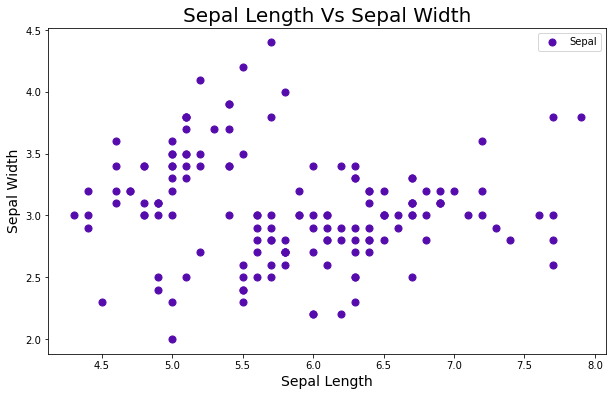

In [20]:
plt.figure(figsize=[10,6])
plt.scatter(iris_data['SepalLengthCm'],iris_data['SepalWidthCm'],s=50,color='#560bad',label='Sepal')

plt.title("Sepal Length Vs Sepal Width",fontsize=20)
plt.xlabel("Sepal Length",fontsize=14)
plt.ylabel("Sepal Width",fontsize=14)

plt.legend()
plt.show()

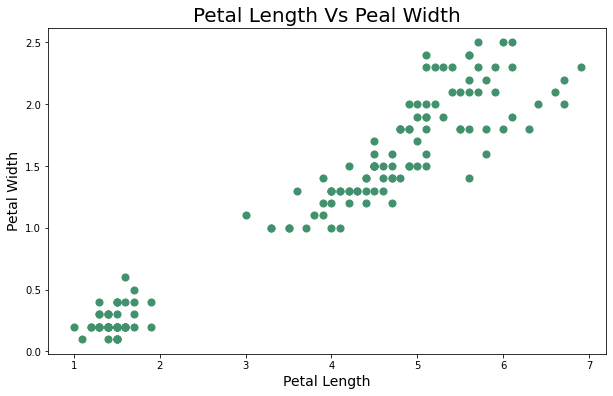

In [21]:
plt.figure(figsize=[10,6])
plt.scatter(iris_data['PetalLengthCm'],iris_data['PetalWidthCm'],s=50,color='#40916c')


plt.title("Petal Length Vs Peal Width",fontsize=20)
plt.xlabel("Petal Length",fontsize=14)
plt.ylabel("Petal Width",fontsize=14)


plt.show()

### Heatmap

### This is to remove duplicate correlation values from the heatmap

In [22]:

iris_=iris_data.drop(['Id'],axis=1)
mask=np.zeros_like(iris_.corr())
triangle_corr=np.triu_indices_from(iris_.corr())
mask[triangle_corr]=True


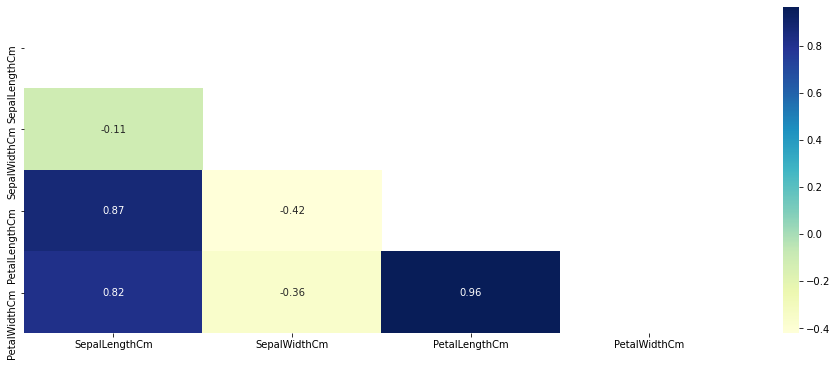

In [23]:
# Plotting the heatmap
plt.figure(figsize=[16,6])
sns.heatmap(iris_.corr(),annot=True,cmap='YlGnBu',mask=mask)
plt.show()


 ## Line plot

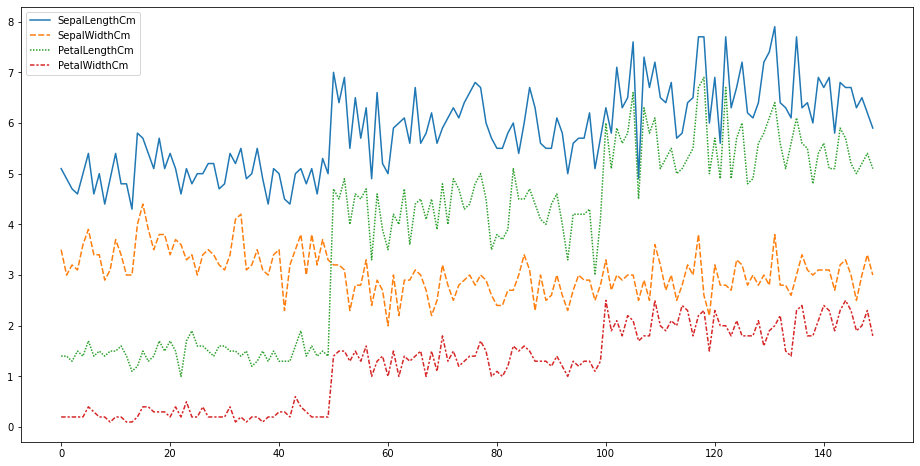

In [24]:
plt.figure(figsize=[16,8])
sns.lineplot(data=iris_)
plt.show()

### PairPlot

<Figure size 1080x504 with 0 Axes>

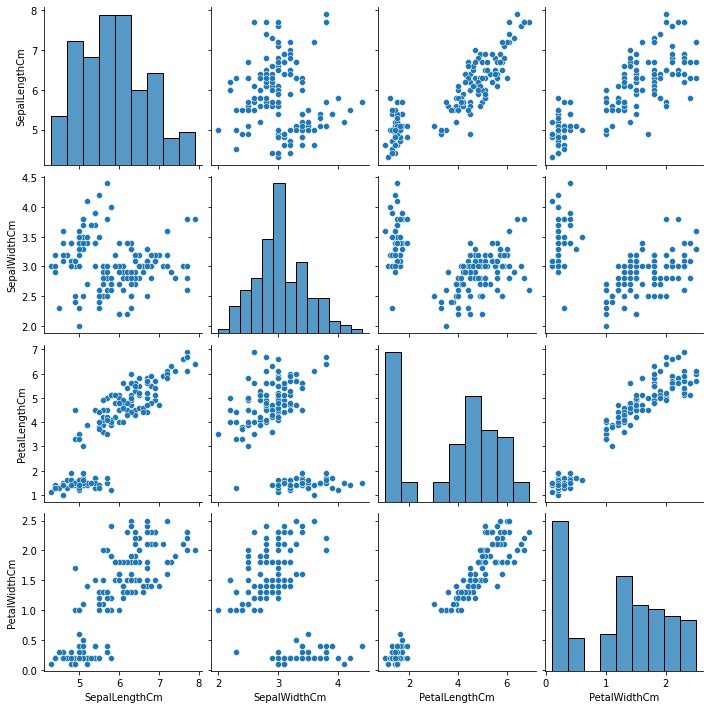

In [25]:
plt.figure(figsize=[15,7])
sns.pairplot(iris_)
plt.show()

### Box Plot

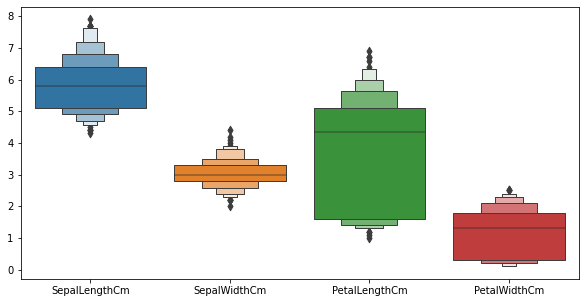

In [26]:
plt.figure(figsize=[10,5])
sns.boxenplot(data=iris_)
plt.show()

## Finding the Optimum Number of Clusters 

In [27]:
cluster=[]
iris = iris_data.iloc[:,1:5].values


for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    kmeans.fit(iris)
    cluster.append(kmeans.inertia_)


## Elbow Method to find the optimum number of clusters

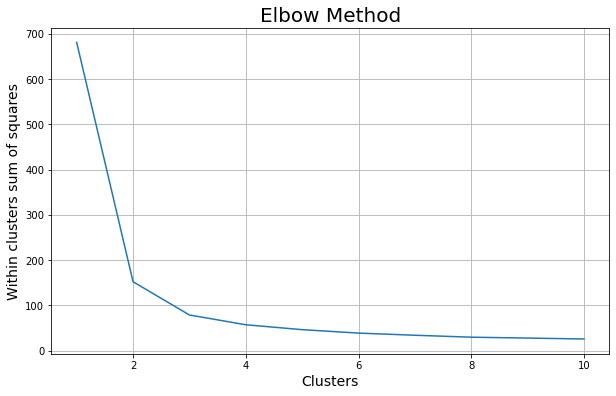

In [28]:
plt.figure(figsize=[10,6])
plt.plot(range(1,11),cluster)

plt.title("Elbow Method",fontsize=20)
plt.xlabel("Clusters",fontsize=14)
plt.ylabel("Within clusters sum of squares",fontsize=14)

plt.grid()
plt.show()

#### By observing the above plot the optimum number of clusters is found to be 3.(the optimum number of clusters is where the elbow occurs 

## Applying k means cluster classification to the given data

In [29]:
kmeans=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(iris)
pred=kmeans.predict(iris)

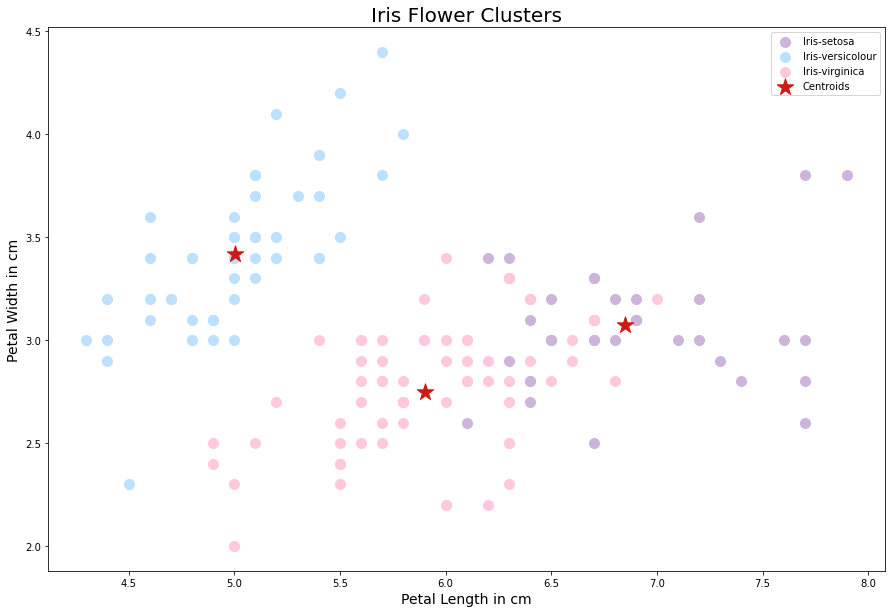

In [30]:

plt.figure(figsize=[15,10])

# Plotting the clusters

plt.scatter(iris[pred == 0, 0], iris[pred == 0, 1],s = 100, c = '#cdb4db', label = 'Iris-setosa')
plt.scatter(iris[pred == 1, 0], iris[pred == 1, 1],s = 100, c = '#bde0fe', label = 'Iris-versicolour')
plt.scatter(iris[pred == 2, 0], iris[pred == 2, 1],s = 100, c = '#ffc8dd', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 300, c = '#cb1b16', label = 'Centroids',marker='*')


plt.title('Iris Flower Clusters',fontsize=20)
plt.ylabel('Petal Width in cm',fontsize=14)
plt.xlabel('Petal Length in cm',fontsize=14)


plt.legend()
plt.show()

# Conclusion

### From the analysis it is shown the optimum number of clusters are 3 in the dataset.the data is visualized using different Plots.

### Thank You.